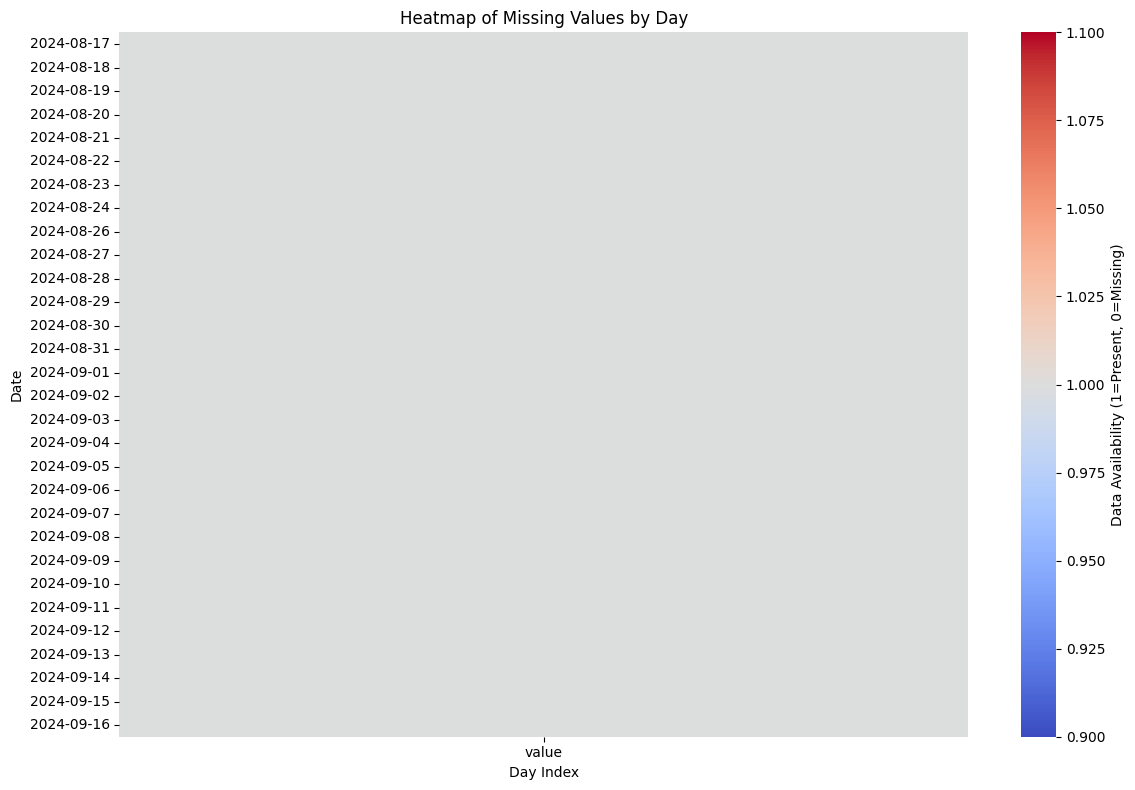

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\qazia5\projects\SET\data\raw\Demand_data.label\Demand_data\raw_data_H2_m1.L.csv')

# Convert timestamp to datetime and extract date
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M')
data['date'] = data['timestamp'].dt.date

# Group by date and check for missing days based on `vL1_Power`
daily_data = data.groupby('date')['vL1_Power'].apply(lambda x: x.notnull().any())

# Create a DataFrame for heatmap
heatmap_data = daily_data.reset_index()
heatmap_data.columns = ['date', 'has_data']

# Pivot the data for heatmap visualization
heatmap_data['value'] = heatmap_data['has_data'].astype(int)
heatmap_matrix = heatmap_data.pivot_table(index='date', values='value', aggfunc='max', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap="coolwarm", cbar_kws={'label': 'Data Availability (1=Present, 0=Missing)'})
plt.title("Heatmap of Missing Values by Day")
plt.xlabel("Day Index")
plt.ylabel("Date")
plt.tight_layout()
plt.show()